<a href="https://colab.research.google.com/github/Raghav2608/5CCSAMLF-CW_1/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import r2_score,root_mean_squared_error
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel,r_regression
from xgboost import XGBRegressor
from sklearn.kernel_ridge import KernelRidge
from lightgbm import LGBMRegressor
from GradientBagging import BaggedGradientBoosting,AdaptiveBaggingGBT
from kernelbagging import BaggedKernelRidge
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("CW1_train.csv")

[]

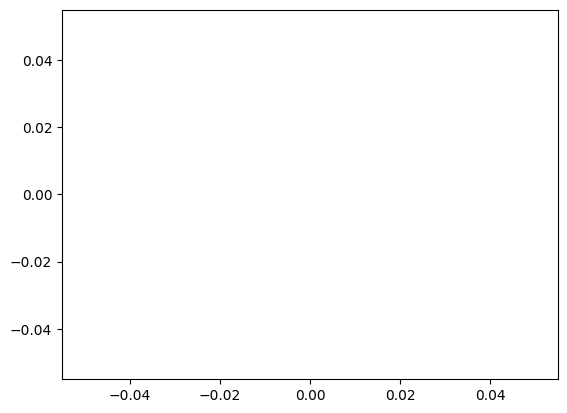

In [ ]:
#generates Histogram Plots for each feature 

for count, value in enumerate(data.columns):
    plt.hist(data[value],density=True,bins=100)
    plt.title(value)
    x_min = min(data[value])
    x_max = max(data[value])
    if isinstance(data[value].iloc[0],str):
        plt.savefig(f"plots/distribution_plot_{value}.png")
        plt.clf()
        
    else:
        plt.xlim([x_min - 0.2*x_min,x_max + 0.2*x_max])
        plt.savefig(f"plots/distribution_plot_{value}.png")
        plt.clf()



In [ ]:
#mean of every feature
data.mean()

In [ ]:
#standard deviation of every feature
data.std()

In [3]:
# using label encoder to encode categorical variables 

le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()

data["cut"] = le1.fit_transform(data.cut.values)
data["color"] = le2.fit_transform(data.color.values)
data["clarity"] = le3.fit_transform(data.clarity.values)

In [ ]:
#plots of each individual feature with outcome 
figure, axis = plt.subplots(31,1,figsize = (8,31*4),tight_layout=True)

for count, value in enumerate(data.columns):
    axis[count].scatter(data[value],data["outcome"])
    axis[count].set_title(value)
    
plt.savefig("Feature_with_outcome_Plots.png")
plt.show()


In [7]:
#creating lower dimensional subset and normalizing X values
low_dim_data = data[["depth","a1","a2","a3","a4","a5","b1","b3","price","table"]]
low_dim_data = (low_dim_data-low_dim_data.mean())/low_dim_data.std()
output = data["outcome"]


In [ ]:
print(output.head())
print(low_dim_data.head())

In [6]:
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(low_dim_data,
    output, test_size=0.1, random_state=42)

In [ ]:
import numpy as np 
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize the model
model =  XGBRegressor(n_estimators=2000,max_depth=3,max_bin=100,reg_alpha=100,
                      booster="gbtree",tree_method="hist",grow_policy="lossguide",
                      eta=0.007,subsample=0.8)


# Store accuracies
accuracies = []
train_accuracies = []
train_variance = []
test_variance = []
train_subsets = None
test_subsets = None

X = low_dim_data.to_numpy()
y = output.to_numpy()
rmse_data = []
i = 0
# Perform K-Fold Cross-Validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    model.fit(X_train, 
    y_train,
    eval_set=[(X_test, y_test)],
    verbose=True
    )

    train_variance.append(y_train.std())
    test_variance.append(y_test.std())

    # Predict
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)

    rmse_data.append(root_mean_squared_error(y_test,y_pred))
    

    i = i + 1
    # Evaluate

    acc = r2_score(y_test, y_pred)
    accuracies.append(acc)
    

# Print the average accuracy

print(f"Average Accuracy: {np.mean(accuracies):.4f}")
print(accuracies)
print()
print(f"Average Accuracy: {np.mean(train_accuracies):.4f}")
print(train_accuracies)
print(f"Average Accuracy: {np.mean(rmse_data):.4f}")
print(rmse_data)

In [ ]:
import numpy as np 
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the model
model = BaggedKernelRidge(n=10,sample_fraction=0.8,kernel="laplacian",degree =4 ,gamma=0.1)

# Store accuracies
accuracies = []
train_accuracies = []
train_variance = []
test_variance = []
train_subsets = None
test_subsets = None

X = low_dim_data.to_numpy()
y = output.to_numpy()
rmse_data = []
i = 0
# Perform K-Fold Cross-Validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    model.fit(X_train, 
    y_train
    )

    train_variance.append(y_train.std())
    test_variance.append(y_test.std())

    # Predict
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)

    rmse_data.append(root_mean_squared_error(y_test,y_pred))
    

    
    # Evaluate
    train_accuracies.append(r2_score(y_train,y_pred_train))
    acc = r2_score(y_test, y_pred)
    accuracies.append(acc)
    

# Print the average accuracy

print(f"Average test Accuracy: {np.mean(accuracies):.4f}")
print(accuracies)
print()
print(f"Average train Accuracy: {np.mean(train_accuracies):.4f}")
print(train_accuracies)


Average test Accuracy: 0.4238
[0.4069414170881184, 0.4520225795166647, 0.42470327917306516, 0.4193625677087889, 0.41597556072791253]

Average train Accuracy: 0.5452
[0.5495978683162677, 0.5401740384606681, 0.5448106446230345, 0.546434198544868, 0.5451633314965812]


In [ ]:
import numpy as np 
kf = KFold(n_splits=10, shuffle=True, random_state=42)

model =  BaggedGradientBoosting(n=25,sample_fraction=0.90,seed=40,n_estimators=2000,max_depth=3,max_bin=100,reg_alpha=100,
                      booster="gbtree",tree_method="hist",grow_policy="lossguide",
                      eta=0.007,subsample=0.8)


# Store accuracies
accuracies = []
train_accuracies = [] 
train_variance = []
test_variance = []
train_subsets = None
test_subsets = None

X = low_dim_data.to_numpy()
y = output.to_numpy()
rmse_data = []
i = 0
# Perform K-Fold Cross-Validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    model.fit(X_train, 
    y_train
    )

    train_variance.append(y_train.std())
    test_variance.append(y_test.std())

    # Predict
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)

    rmse_data.append(root_mean_squared_error(y_test,y_pred))
    


    # Evaluate

    acc = r2_score(y_test, y_pred)
    accuracies.append(acc)

    train_accuracies.append(r2_score(y_train,y_pred_train))
    

# Print the average accuracy

print(f"Average Accuracy: {np.mean(accuracies):.4f}")
print(accuracies)
print()
print(f"Average Accuracy: {np.mean(train_accuracies):.4f}")
print(train_accuracies)
print()
print(f"Average Accuracy: {np.mean(rmse_data):.4f}")
print(rmse_data)

Average Accuracy: 0.4792
[0.4612007497819606, 0.47021816140466155, 0.5311889500226474, 0.4997408046709606, 0.46915390189744055, 0.47566079733233657, 0.4505727963127295, 0.503324572367715, 0.4669763989057837, 0.4644561350887104]

Average Accuracy: 0.5205
[0.5228947187998301, 0.5216660410905062, 0.5147056140680981, 0.518460463743255, 0.5211612103898473, 0.5209435207076615, 0.523891212572611, 0.517764435247138, 0.5222433430749589, 0.5217077072760451]

Average Accuracy: 9.1691
[np.float64(9.243247847014796), np.float64(9.416230090800767), np.float64(9.107229708398716), np.float64(8.90811320353094), np.float64(9.251155588048835), np.float64(9.371073173147728), np.float64(9.22369779239022), np.float64(8.823888020883482), np.float64(9.16922249637101), np.float64(9.177033543745985)]


In [9]:
import numpy as np 
kf = KFold(n_splits=10, shuffle=True, random_state=42)

model =  LinearRegression()

# Store accuracies
accuracies = []
train_accuracies = [] 
train_variance = []
test_variance = []
train_subsets = None
test_subsets = None

X = low_dim_data.to_numpy()
y = output.to_numpy()
rmse_data = []
i = 0
# Perform K-Fold Cross-Validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    model.fit(X_train, 
    y_train
    )

    train_variance.append(y_train.std())
    test_variance.append(y_test.std())

    # Predict
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)

    rmse_data.append(root_mean_squared_error(y_test,y_pred))
    


    # Evaluate

    acc = r2_score(y_test, y_pred)
    accuracies.append(acc)

    train_accuracies.append(r2_score(y_train,y_pred_train))
    

# Print the average accuracy

print(f"Average Accuracy: {np.mean(accuracies):.4f}")
print(accuracies)
print()
print(f"Average Accuracy: {np.mean(train_accuracies):.4f}")
print(train_accuracies)
print()
print(f"Average Accuracy: {np.mean(rmse_data):.4f}")
print(rmse_data)

Average Accuracy: 0.2856
[0.26358512164647274, 0.2760327125535066, 0.3199517712985487, 0.3105845960501523, 0.2799516881196644, 0.26498668107329215, 0.2934505035781134, 0.2919861663822695, 0.2524952073030191, 0.3031346125226665]

Average Accuracy: 0.2882
[0.2907315492505369, 0.2893754746604674, 0.28407910578253115, 0.28545300282827546, 0.2887745104041173, 0.2906350371203563, 0.2873049625569165, 0.28765311129058824, 0.29184224735557185, 0.28630552968540823]

Average Accuracy: 10.7431
[np.float64(10.806184646407944), np.float64(11.00748242154556), np.float64(10.968752266256168), np.float64(10.457519394369397), np.float64(10.774384963213313), np.float64(11.095088450796352), np.float64(10.459749443204458), np.float64(10.535242157746902), np.float64(10.858411161461369), np.float64(10.468374285068103)]


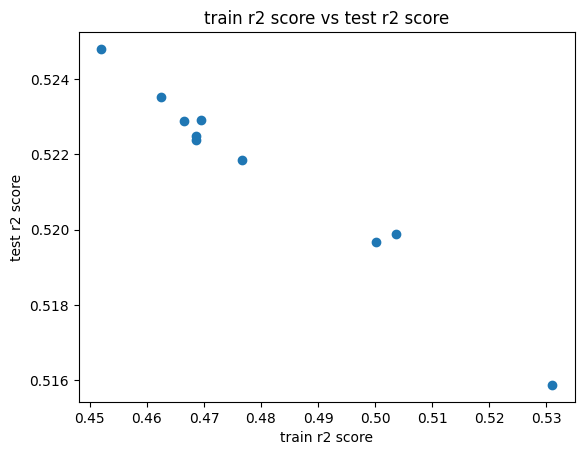

In [ ]:
plt.scatter(accuracies,train_accuracies)
plt.xlabel("train r2 score")
plt.ylabel("test r2 score")
plt.title("train r2 score vs test r2 score")
#plt.savefig("train_vs_test_r2.png")
plt.show()



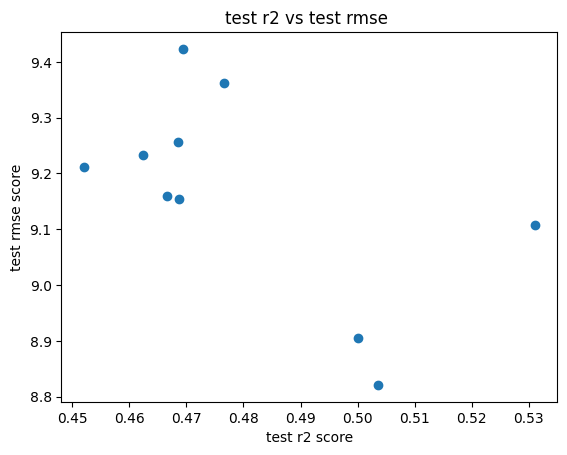

In [111]:
plt.scatter(accuracies,rmse_data)
plt.xlabel("test r2 score")
plt.ylabel("test rmse score")
plt.title("test r2 vs test rmse ")
plt.savefig("r2_v_rmse_.png")
plt.show()

In [102]:
model =  BaggedGradientBoosting(n=25,sample_fraction=1,seed=40,n_estimators=2000,max_depth=3,max_bin=100,reg_alpha=100,
                      booster="gbtree",tree_method="hist",grow_policy="lossguide",
                      eta=0.007,subsample=0.8)
model.fit(low_dim_data.values,output.values)


In [103]:
r2_score(output.values,model.predict(low_dim_data.values))

0.5188796710568344

In [100]:
test_data = pd.read_csv("CW1_test.csv")
test_x = test_data[["depth","a1","a2","a3","a4","a5","b1","b3","price","table"]]
test_x = (test_x-test_x.mean())/test_x.std()
preds = model.predict(test_x.values)
out = pd.DataFrame({"yhat":preds})
out.to_csv("CW1_submission_K23098128.csv",index=False)

In [ ]:
import numpy as np 
kf = KFold(n_splits=10, shuffle=True, random_state=42)

#n_estimators=200,eta=0.08,grow_policy="lossguide",subsample=0.8,colsample_bynode=0.8
# Initialize the model
gb_params = {"n_estimators":200,
             "eta":0.8,
             "subsample":0.8,
             "colsample_bynode":0.8
            }


model =  AdaptiveBaggingGBT(n=25,sample_fraction=1,test_size=0.01,alpha=0.05,n_estimators=2000,max_depth=3,max_bin=100,reg_alpha=100,
                      booster="gbtree",tree_method="hist",grow_policy="lossguide",
                      eta=0.007,subsample=0.8)


# Store accuracies
accuracies = []
train_accuracies = [] 
train_variance = []
test_variance = []
train_subsets = None
test_subsets = None

X = low_dim_data.to_numpy()
y = output.to_numpy()
rmse_data = []
i = 0
# Perform K-Fold Cross-Validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    model.fit(X_train, 
    y_train
    )

    train_variance.append(y_train.std())
    test_variance.append(y_test.std())

    # Predict
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)

    rmse_data.append(root_mean_squared_error(y_test,y_pred))
    


    # Evaluate

    acc = r2_score(y_test, y_pred)
    accuracies.append(acc)

    train_accuracies.append(r2_score(y_train,y_pred_train))
    

# Print the average accuracy

print(f"Average Accuracy: {np.mean(accuracies):.4f}")
print(accuracies)
print()
print(f"Average Accuracy: {np.mean(train_accuracies):.4f}")
print(train_accuracies)

Average Accuracy: 0.4797
[0.46115213656167475, 0.46975494458668643, 0.530578744500908, 0.5002022258703931, 0.4678288455318742, 0.4775399662026385, 0.4513860283410215, 0.5027962375005971, 0.46924533999519025, 0.46687778990716267]

Average Accuracy: 0.5215
[0.5240402919133209, 0.5227694439243067, 0.515793094197037, 0.5195159328747972, 0.5226488838603041, 0.5220134775718408, 0.5247694375541043, 0.5185045755068427, 0.522200503285163, 0.5232221796726697]


In [ ]:
import numpy as np 
kf = KFold(n_splits=10, shuffle=True, random_state=42)

#n_estimators=200,eta=0.08,grow_policy="lossguide",subsample=0.8,colsample_bynode=0.8
# Initialize the model
gb_params = {"n_estimators":200,
             "eta":0.8,
             "subsample":0.8,
             "colsample_bynode":0.8
            }

model =  RandomForestRegressor(n_estimators=100,max_depth=6)


# Store accuracies
accuracies = []
train_accuracies = [] 
train_variance = []
test_variance = []
train_subsets = None
test_subsets = None

X = low_dim_data.to_numpy()
y = output.to_numpy()
rmse_data = []
i = 0
# Perform K-Fold Cross-Validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    model.fit(X_train, 
    y_train
    )

    train_variance.append(y_train.std())
    test_variance.append(y_test.std())

    # Predict
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)

    rmse_data.append(root_mean_squared_error(y_test,y_pred))
    


    # Evaluate

    acc = r2_score(y_test, y_pred)
    accuracies.append(acc)

    train_accuracies.append(r2_score(y_train,y_pred_train))
    

# Print the average accuracy

print(f"Average Accuracy: {np.mean(accuracies):.4f}")
print(accuracies)
print()
print(f"Average Accuracy: {np.mean(train_accuracies):.4f}")
print(train_accuracies)

Average Accuracy: 0.4580
[0.433362616253932, 0.4482770395210517, 0.5083006533291807, 0.48015905488985433, 0.4483965816944867, 0.45581365022730436, 0.41605205497469866, 0.4886482665630276, 0.4500452026999032, 0.451220979232712]

Average Accuracy: 0.5482
[0.5505407428162528, 0.5507061661575092, 0.5424434080840987, 0.5464598902034852, 0.549397694663336, 0.5497932187692935, 0.552047777971614, 0.5452335495239657, 0.5485530583643621, 0.5468892487156177]


In [10]:
model.weights

array([0.07314986, 0.07005703, 0.12506386, 0.15405786, 0.06261039,
       0.05448192, 0.10188373, 0.18406377, 0.069875  , 0.10475656])

In [8]:
model.n

10

In [87]:
train_variance = np.array(train_variance)**2

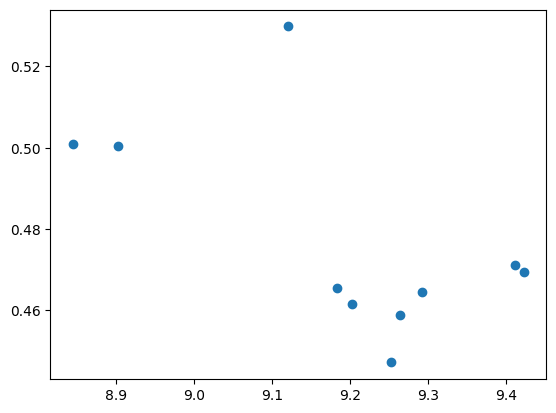

In [322]:
plt.scatter(rmse_data,accuracies)
plt.show()

In [ ]:
kernel_model = KernelRidge(kernel="laplacian",degree = 3,gamma=0.01)
kernel_model.fit(X_train_t,y_train_t)
r2_score(y_test_t,kernel_model.predict(X_test_t))

0.4399636244989874

In [321]:
X = X_train_t.values
y = y_train_t.values
test_x = X_test_t.values
test_y = y_test_t.values

model2 = LGBMRegressor(n_estimators=100)
model2.fit(X, 
    y
)

y_pred = model2.predict(test_x)
rmse = root_mean_squared_error(test_y,y_pred)
act = r2_score(y,model2.predict(X))
acc = r2_score(test_y, y_pred)
print(acc)
print(act)
print(rmse)

0.44222570313857856
0.6571280246889513
9.404600583557693


In [334]:
X = X_train_t.values
y = y_train_t.values
test_x = X_test_t.values
test_y = y_test_t.values

'''
XGBRegressor(n_estimators=1200,max_depth=3,max_bin=70,reg_alpha=100,
                      booster="gbtree",tree_method="hist",grow_policy="lossguide",
                      eta=0.007,subsample=0.8,colsample_bynode=0.8)
'''
model2 = BaggedGradientBoosting(n=20,n_estimators=500,max_depth=3,eta=0.01,grow_policy="lossguide",subsample=0.8,colsample_bynode=0.8)
model2.fit(X,y)


y_pred = model2.predict(test_x)
rmse = root_mean_squared_error(test_y,y_pred)
act = r2_score(y,model2.predict(X))
acc = r2_score(test_y, y_pred)
print(acc)
print(act)
print(rmse)


0.458662587069226
0.5208659930082229
9.264993703365102


In [336]:
X = X_train_t.values
y = y_train_t.values
test_x = X_test_t.values
test_y = y_test_t.values

'''
XGBRegressor(n_estimators=1200,max_depth=3,max_bin=70,reg_alpha=100,
                      booster="gbtree",tree_method="hist",grow_policy="lossguide",
                      eta=0.007,subsample=0.8,colsample_bynode=0.8)
'''
model2 = XGBRegressor(n_estimators=1200,max_depth=3,max_bin=70,reg_alpha=100,
                      booster="gbtree",tree_method="hist",grow_policy="lossguide",
                      eta=0.007,subsample=0.8,colsample_bynode=0.8)
model2.fit(X,y)


y_pred = model2.predict(test_x)
rmse = root_mean_squared_error(test_y,y_pred)
act = r2_score(y,model2.predict(X))
acc = r2_score(test_y, y_pred)
print(acc)
print(act)
print(rmse)


0.45464402375912194
0.5079384602823305
9.299318988515116


In [324]:

X = X_train_t.values
y = y_train_t.values
test_x = X_test_t.values
test_y = y_test_t.values

model2 = LGBMRegressor(n_estimators=700,max_depth=3,num_leaves=20,reg_alpha=300,learning_rate=0.04)
model2.fit(X,y)


y_pred = model2.predict(test_x)
rmse = root_mean_squared_error(test_y,y_pred)
act = r2_score(y,model2.predict(X))
acc = r2_score(test_y, y_pred)
print(acc)
print(act)
print(rmse)

0.4578121578381884
0.5223089925264673
9.272268398582709


In [298]:
import numpy as np 
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize the model
model = LGBMRegressor(n_estimators=700,max_depth=3,num_leaves=20,reg_alpha=300,learning_rate=0.04)

# Store accuracies
accuracies = []
train_accuracies = []
train_variance = []
test_variance = []
train_subsets = None
test_subsets = None

X = low_dim_data.to_numpy()
y = output.to_numpy()
rmse_data = []
i = 0
# Perform K-Fold Cross-Validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    model.fit(X_train, 
    y_train
    )

    train_variance.append(y_train.std())
    test_variance.append(y_test.std())

    # Predict
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)

    rmse_data.append(root_mean_squared_error(y_test,y_pred))
    

    i = i + 1
    # Evaluate

    acc = r2_score(y_test, y_pred)
    accuracies.append(acc)
    

# Print the average accuracy

print(f"Average Accuracy: {np.mean(accuracies):.4f}")
print(accuracies)
print()
print(f"Average Accuracy: {np.mean(train_accuracies):.4f}")
print(train_accuracies)
print(f"Average rmse: {np.mean(rmse_data):.4f}")

Average Accuracy: 0.4752
[0.45807247755912517, 0.46636000404552147, 0.5271880447998634, 0.4943817832274544, 0.463364889590301, 0.4725725156267163, 0.4460958010877675, 0.501206560174566, 0.4629437002564015, 0.4599353691869781]

Average Accuracy: nan
[]
Average rmse: 9.2046


c:\Users\HP\OneDrive\Documents\GitHub\5CCSAMLF-CW_1\.venv\lib\site-packages\numpy\_core\fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\HP\OneDrive\Documents\GitHub\5CCSAMLF-CW_1\.venv\lib\site-packages\numpy\_core\_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [320]:
y_pred1 = model2.predict(test_x)
y_pred2 = model.predict(test_x)
print(root_mean_squared_error(test_y,y_pred1))
print(root_mean_squared_error(test_y,y_pred2))


8.332616554083243
7.526534530618222


In [44]:
data.iloc[train_subsets].to_csv("good_training.csv")
data.iloc[test_subsets].to_csv("good_test.csv")

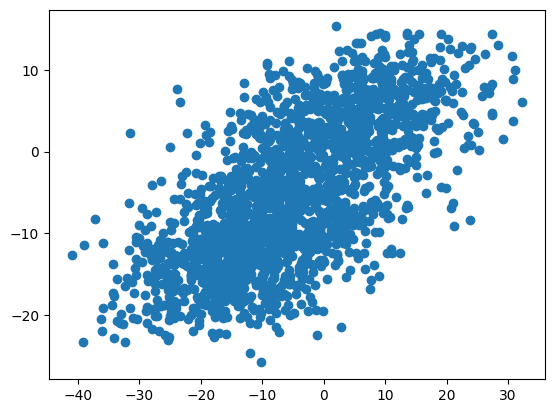

In [46]:
plt.scatter(y_test,model.predict(X_test))
plt.show()

In [7]:
rf2_model = RandomForestRegressor(n_estimators=1000,random_state=42,min_samples_leaf=50,min_samples_split=10)
rf2_model.fit(X_train,y_train)
r2_score(y_test,rf2_model.predict(X_test))

KeyboardInterrupt: 

In [202]:
r2_score(y_test,model.predict(X_test))

0.4848193599375864

In [38]:
r_correlation = r_regression(X_train,y_train)

In [40]:
pearson_score = {}
k = 0
for i in X_train.columns:
    pearson_score[i] = r_correlation[k]
    k = k+1

sorted_pearson_score = dict(sorted(pearson_score.items(), key=lambda item: item[1],reverse=True))
print(sorted_pearson_score)

In [ ]:
model = SelectFromModel(lr, prefit=True)
X_new = model.transform(X_train)


c:\Users\HP\OneDrive\Documents\GitHub\5CCSAMLF-CW_1\.venv\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


array([[6.22000000e+01, 6.40119848e-01, 4.34296660e-01, 6.55030920e-01,
        9.34767924e-01],
       [6.19000000e+01, 3.81484625e-02, 3.39874888e-01, 7.97233889e-01,
        3.73380316e-01],
       [6.35000000e+01, 2.87913845e-01, 6.75811530e-01, 8.02844994e-01,
        1.15257678e-01],
       ...,
       [6.19000000e+01, 7.87917652e-01, 1.69519018e-01, 2.47975235e-01,
        5.26538940e-01],
       [6.30000000e+01, 3.35944623e-01, 5.02361314e-01, 9.48243233e-01,
        4.89768671e-01],
       [6.27000000e+01, 9.20023200e-01, 3.64839345e-01, 2.06491323e-01,
        8.62624634e-01]])

RandomForestRegressor()